# Installation Guide

# In ___bio_process___ function

## Create BioPocess object

In [ ]:
import pandas as pd

from CCDPApy.BioProcess.BioProcess import BioProcess
from CCDPApy.helper_func.helper_func import input_path
from CCDPApy.pre_process.pre_process import pre_process
from CCDPApy.in_process.in_process import cumulative_calc
from CCDPApy.post_process.two_point_calc.twopt_calc import twopt_calc
from CCDPApy.post_process.polynomial_regression.polynomial_regression import polyreg_calc
from CCDPApy.post_process.rolling_regression.rolling_regression import rolling_regression

input_file = 'VS_NIIMBL VS-001.xlsx'
measurement_sheet = 'Glutamine'

# Get File Path
file_path = input_path(file_name=input_file)
# Read Measured Data
measured_data = pd.read_excel(io=file_path, sheet_name=measurement_sheet, header=5)
# Read Experiment Info
exp_info = pd.read_excel(io=file_path, sheet_name=measurement_sheet, nrows=4, usecols=[0, 1], header=None, index_col=0)
print(f'{input_file} imported.')

# Bio Process Class
bioprocess = BioProcess(experiment_info=exp_info,
                        measured_data=measured_data)

# Check Spcies list to analze
#if (kwargs.get('spc_list')):
#    spc_list = [name.upper() for name in kwargs.get('spc_list')] # Set AA List
#    bioprocess.set_spc_list(spc_list=spc_list)

# Check New Species List to Add
#if (kwargs.get('add_spc')):
#    bioprocess.set_new_spc(new_spc_list=kwargs.get('add_spc')) # add new species to spc_list'''

### Example

In [ ]:
bioprocess.disp_experiment()

## Pre Process

Calculate run time(days), run time (hrs), culture volume before sampling (mL), and culture volume after sampling (mL). <br>

Parameters:
----------
    bio_process : BioProcess object
    feed_name : str
        spcies name of feed added during the experiment.<br>
        must be the same name of the measured data in the Excel File. 

In [ ]:
measurement_sheet = 'Glutamine'
pre_process(bio_process=bioprocess, feed_name=measurement_sheet)

### Examples

In [ ]:
bioprocess.disp_pre_process()

## In Process

Calculate cumulative consumptions/productions for species.<br>

Parameters:
----------
    bio_process : BioProcess object
    feed_name : str
        spcies name of feed added during the experiment.<br>
        must be the same name of the measured data in the Excel File.
    use_feed_conc : bool, default=False, optional 
        must be True if feed concentrations are to be used to calculate cumulative consumptions/productions.
    use_conc_after_feed : bool, default=False, optional
        must be True if concentrations after feeding are to be used to calculate cumulative consumptions/productions.


In [ ]:
measurement_sheet = 'Glutamine'
cumulative_calc(bio_process=bioprocess,
                feed_name=measurement_sheet,
                use_feed_conc=True,
                use_conc_after_feed=False)

### Examples

##### Disp

In [ ]:
bioprocess.disp_data(spc='cell', process='inpro')
bioprocess.disp_data(spc='oxygen', process='inpro')
bioprocess.disp_data(spc='product', process='inpro')
bioprocess.disp_data(spc='metabolite', process='inpro')

##### Plot

In [ ]:
plot_list = 'cell'
profile = 'conc'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, viability=True)

In [ ]:
plot_list = ['glucose', 'glutamine']
profile = ['conc', 'cumulative']

fig = bioprocess.plot(spc_list=plot_list,
                      profile=profile,
                      #combined=True,
                      )

In [ ]:
plot_list = ['glucose', 'glutamine']
profile = ['conc', 'cumulative']

fig = bioprocess.plot(spc_list=plot_list,
                      profile=profile,
                      combined=True,
                      )

## Post Process

### Two-Point Calculations

Calculate SP. rate for species using Two-Point Calculation.<br>

Parameters:
----------
    bio_process : BioProcess object

In [ ]:
twopt_calc(bio_process=bioprocess)

#### Examples

##### Disp

In [ ]:
bioprocess.disp_data(spc='cell', process='twopt')
bioprocess.disp_data(spc='oxygen', process='twopt')
bioprocess.disp_data(spc='igg', process='twopt')
bioprocess.disp_data(spc='metabolite', process='twopt')

##### Plot

In [ ]:
plot_list = ['glucose', 'glutamine']
profile = 'sp rate'
method = 'twopt'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method)

In [ ]:
plot_list = ['glucose', 'glutamine']
profile = 'sp rate'
method = 'twopt'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method, combined=True)

In [ ]:
plot_list = ['glucose', 'glutamine']
profile = 'all'
method = 'twopt'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method)

### Polynomial Regression

Calculate SP. rate for species using Polynomial Regression.<br>

Parameters:
----------
    bio_process : BioProcess object
    polyorder_file : str, default=None, optional
        an Excel file of polynomial orders for species.<br>
        if this argument is None, the order of 3 is to be used for all species.

In [ ]:
poly_file = 'polynomial_order_1.xlsx'
polyreg_calc(bio_process=bioprocess, polyorder_file=poly_file)

#### Examples

##### Disp

In [ ]:
bioprocess.disp_data(spc='cell', process='polyreg')
bioprocess.disp_data(spc='oxygen', process='polyreg')
bioprocess.disp_data(spc='igg', process='polyreg')
bioprocess.disp_data(spc='metabolite', process='polyreg')

##### Plot

In [ ]:
plot_list = ['glucose', 'glutamine']
profile = 'sp rate'
method = 'polyreg'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method)

In [ ]:
plot_list = ['glucose', 'glutamine']
profile = ['sp rate', 'cumulative']
method = 'all'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method)

In [ ]:
plot_list = ['glucose', 'glutamine']
profile = 'all'
method = 'all'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method, combined=True)

### Rolling Polynomial Regression

Calculate SP. rate for species using Rolling Polynomial Regression.<br>

Parameters:
----------
    bio_process : BioProcess object
    order : int, default=3, optional
        polynomial order for the rolling polynomial regression.
    windows : int, default=6, optional
        data point size that is to be used for the regression.


In [ ]:
rolling_regression(bio_process=bioprocess, order=3, windows=6)

#### Examples

##### Disp

In [ ]:
bioprocess.disp_data(spc='cell', process='rollreg')
bioprocess.disp_data(spc='oxygen', process='rollreg')
bioprocess.disp_data(spc='igg', process='rollreg')
bioprocess.disp_data(spc='metabolite', process='rollreg')

##### Plot

In [ ]:
plot_list = ['glucose', 'glutamine']
profile = 'sp rate'
method = 'rollreg'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method)

In [ ]:
plot_list = ['glucose', 'glutamine']
profile = ['sp rate', 'conc']
method = 'all'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method)

In [ ]:
plot_list = ['glucose', 'glutamine']
profile = 'all'
method = 'all'

fig = bioprocess.plot(spc_list=plot_list, profile=profile, method=method)

# ___bio_process___

Execute bioprocess; pre process, in process, post process.

Parameters
----------
    input_file : str
        an Excel file of the measured data.
    measurement_sheet : str
        the sheet name of the measured data Excel file.<br>
        must be the same as name of species feed added.<br>
        E.g. 'Glutamine', 'Glucose'

Returns
-------
    bio_process : python object
        Bioprocess object.

Other Parameters
----------------
**kwargs : bio_process properties, optional<br>
    Properties:<br>

    
    spc_list: list of str.
        List of species name to be analyzed.
        Upper, lower, or capitalized case can be uesd.
        If this is no list is passed, original species list is to be used.
        default=['Alanine', 'Arginine', 'Asparagine', 'Aspartate', 'Cystine','Glucose', 'Glutamine', 'Glutamate', 'Glycine', 'Histidine','Isoleucine', 'Lactate', 'Leucine','Lysine', 'Methonine', 'NH3','Phenylalanine', 'Proline', 'Serine', 'Threonine', 'Tryptophan','Tyrosine', 'Valine','Ethanolamine']

    add_spc: list of str.
        List of new species name to be analuzed, which is not listed in the original species list.

    use_feed_conc: bool, default=False
        True if the measured data has the measurements of feed concentrations. Otherwise, False.

    use_conc_after_feed: bool, default=False
        True if the measured data has the measurements of concentrations after feeding. Otherwiese, False.

    all_method: bool
        True if all regression methods are required.

    polyreg:  bool
        True if polynomial regression is needed.

    polyorder_file: string, default='polynomial_order.xlsx'.
        Name of the file, whihc includes species name and the polynomial order for each species.
        '.xlsx' must be included in the file name. The default polynomial order of 3 is to be used, if this is not specified.

    rollreg: bool
        True if rolling polynomial regression is needed.

    rollreg_order: int, default=3
        The polynomial order for the regression.

    rollreg_window: int, default=6
        The window size for the regression.


In [ ]:
from CCDPApy import bio_process

input_file = 'VS_NIIMBL VS-001.xlsx'
measurement_sheet = 'Glutamine'
key = {'use_feed_conc': True,
       'use_conc_after_feed': False,
       'spc_list': ['Glucose', 'Lactate', 'Glutamine', 'Asparagine', 'Aspartate'],
       'polyreg': True, 'polyorder_file': 'polynomial_order_1.xlsx',
       'rollreg': True, 'rollreg_order': 3, 'rollreg_window': 6,
       }

bioprocess = bio_process(input_file=input_file,
                         measurement_sheet=measurement_sheet,
                         **key)

# ___CellLine___ Class

In [ ]:
from CCDPApy import CellLine

cell_line = CellLine()
cell_line.add_bio_process(bio_process=bioprocess)

## Example

In [ ]:
cell_line.disp_cell_lines()

# Tutorial For Cell Line 1

Cell Line 1 has __3 differnet experiments__.<br>
Cell Line 1 has __feed concentrations__ but no measurements of __concentrations after feeding__.
__Glutamine__ feed is added in Cell Line 1.

In [1]:
from CCDPApy import CellLine    # used to aggregate all cell lines and experiments data
from CCDPApy import bio_process # used for data process of one experiment

data_file_1 = ['VS_NIIMBL VS-001.xlsx', 'VS_NIIMBL VS-002.xlsx', 'VS_NIIMBL VS-003.xlsx']
sheet_1 = 'Glutamine'
key_cl1 = {'use_feed_conc': True,
           'use_conc_after_feed': False,
           'spc_list': ['Glucose','Lactate','Glutamine','Asparagine','Aspartate'],
           'polyreg': True, 'polyorder_file': 'polynomial_order_1.xlsx',
           'rollreg': True, 'rollreg_order': 3, 'rollreg_window': 6,
           }

cell_line = CellLine()

for input in data_file_1:
    cl_1 = bio_process(input_file=input, measurement_sheet=sheet_1, **key_cl1)
    cell_line.add_bio_process(bio_process=cl_1)

VS_NIIMBL VS-001.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
VS_NIIMBL VS-002.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
VS_NIIMBL VS-003.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.


In [ ]:
cell_line.disp_cell_lines()

# Tutorial For Cell Line 2

Cell Line 2 has __3 experiments__.<br>
Cell Line 2 has measurements of __concentrations after feeding__ but does't have __feed concentraions__.<br>
__Glucose__ feed is added in Cell Line 2.

In [2]:
data_file_2 = ['GS_Sigma_FB01_B1.xlsx', 'GS_Sigma_FB01_B2.xlsx', 'GS_Sigma_FB01_B3.xlsx']
sheet_2 = 'Glucose'
key_cl2 = {'use_feed_conc': False,
           'use_conc_after_feed': True,
           'spc_list': ['Glucose','Lactate','Glutamine','Asparagine','Aspartate'],
           'polyreg': True, 'polyorder_file': 'polynomial_order_2.xlsx',
           'rollreg': True, 'rollreg_order': 3, 'rollreg_window': 6,
           }
for input in data_file_2:
    cl_2 = bio_process(input_file=input, measurement_sheet=sheet_2, **key_cl2)
    cell_line.add_bio_process(bio_process=cl_2)


GS_Sigma_FB01_B1.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
GS_Sigma_FB01_B2.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
GS_Sigma_FB01_B3.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.


In [ ]:
cell_line.disp_cell_lines()

# Tutorial For Cell Line 3

Cell Line 3 has __3 experiments__.<br>
Cell Line 3 doesn't have both measurements of __concentrations after feeding__ and __feed concentraions__.<br>
For __glucose__, Cell Line 3 has the __calculated cumulative profile__ in Measured Data.<br>
__Glutamine__ feed is added in Cell Line 3.

In [3]:
data_file_3 = ['Merck_XB50.xlsx', 'Merck_XB51.xlsx', 'Merck_XB52.xlsx']
sheet_3 = 'Glutamine'
key_cl3 = {'use_feed_conc': False,
           'use_conc_after_feed': False,
           'spc_list': ['Glucose','Lactate','Glutamine','Asparagine','Aspartate'],
           'all_method': True
           }

for input in data_file_3:
    cl_3 = bio_process(input_file=input, measurement_sheet=sheet_3, **key_cl3)
    cell_line.add_bio_process(bio_process=cl_3)

Merck_XB50.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
Merck_XB51.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.
Merck_XB52.xlsx imported.
Done Pre-Process.
Done In-Process.
Done Two-Point Calculations.
Done Polynomial Regression.
Done Rolling Regression.


In [ ]:
cell_line.disp_cell_lines()

# Plotting

## One Experiment

### Each plot for each species

In [ ]:
cell_line.get_cell_line_list()

In [ ]:
plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']
cl1_dict = cell_line.get_cell_line(cl_name='GS CHOZN Clone 23')
exp1 = cl1_dict['NIIMBL VS-002']
fig = exp1.plot(spc_list=plot_list, profile='all', method='all')

### Multiple species on the same plot

In [ ]:
plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']
cl1_dict = cell_line.get_cell_line(cl_name='GS CHOZN Clone 23')
exp1 = cl1_dict['NIIMBL VS-003']
fig = exp1.plot(spc_list=plot_list, profile='all', method='all', combined=True)

## Different Experiments in One Cell Line

In [ ]:
cell_line.get_cell_line_list()

In [ ]:
plot_list = plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']
fig = cell_line.plot_exps(cell_line='GS Sigma CHOZN Clone 23', spc_list=plot_list)

## Different Cell Lines and Their Experiments

['GS CHOZN Clone 23', 'GS Sigma CHOZN Clone 23', 'Merck']


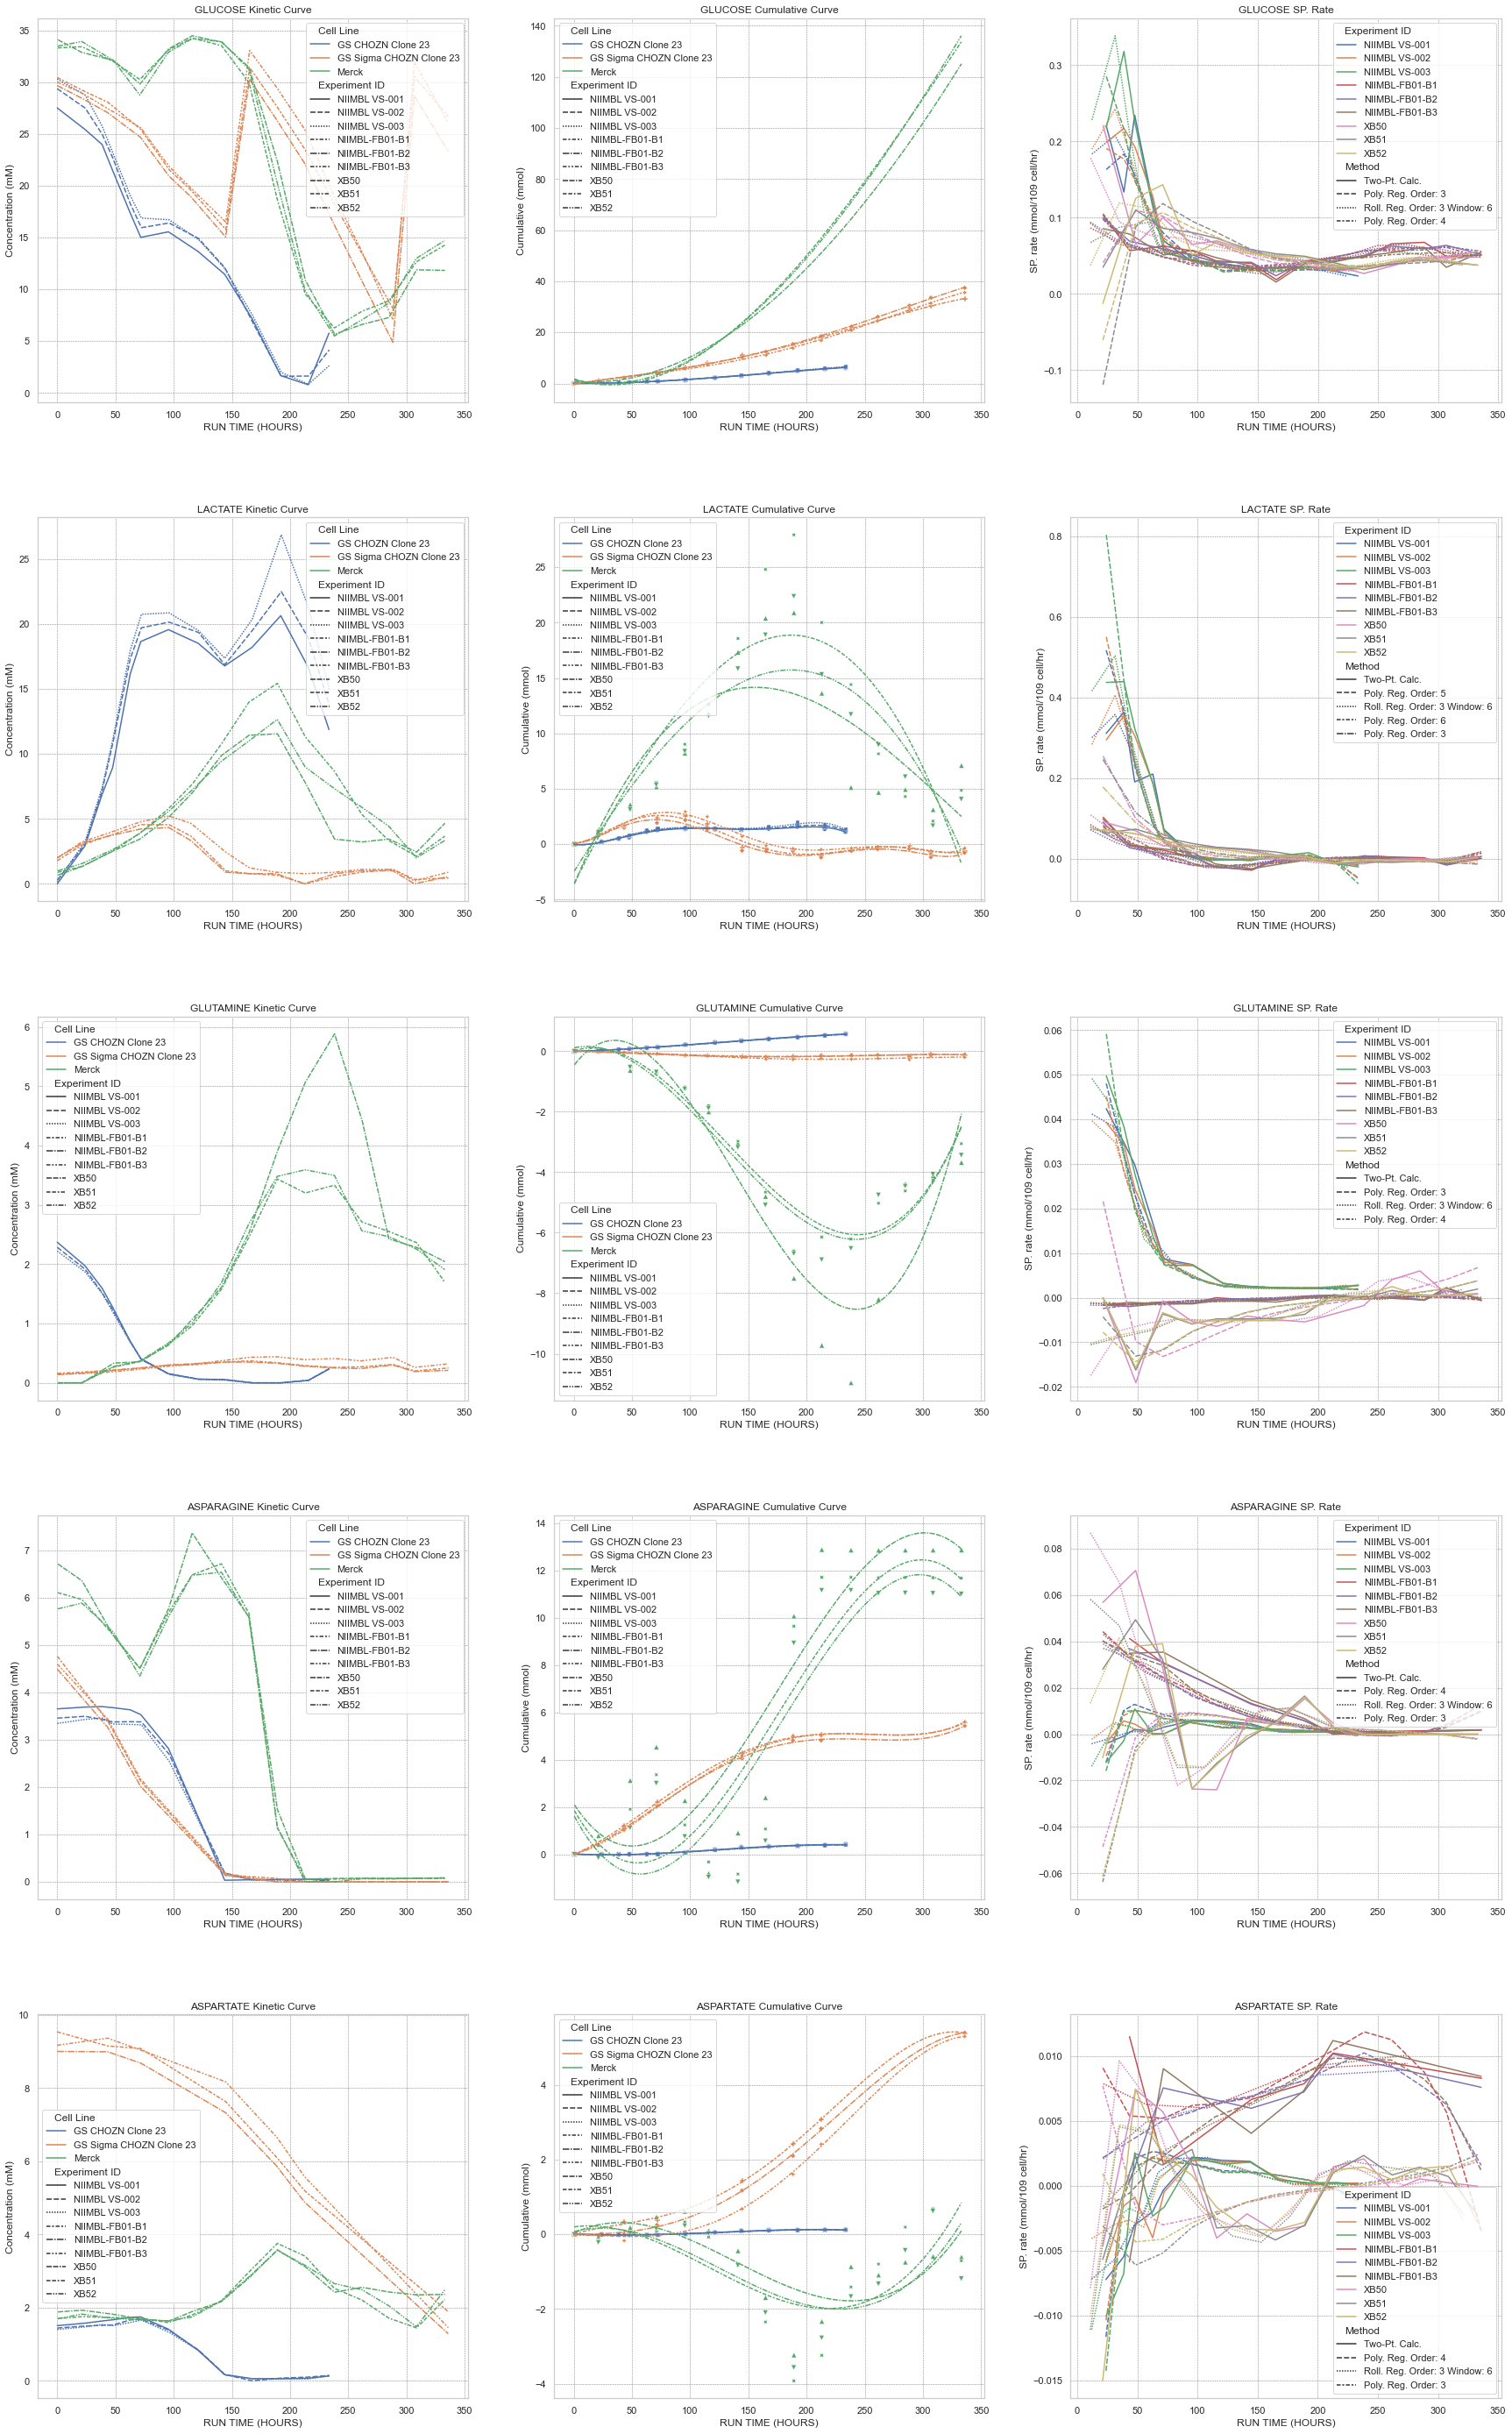

In [7]:
plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']

fig = cell_line.plot_cell_lines(spc_list=plot_list, compare_cell_line=False)

['GS CHOZN Clone 23', 'GS Sigma CHOZN Clone 23', 'Merck']


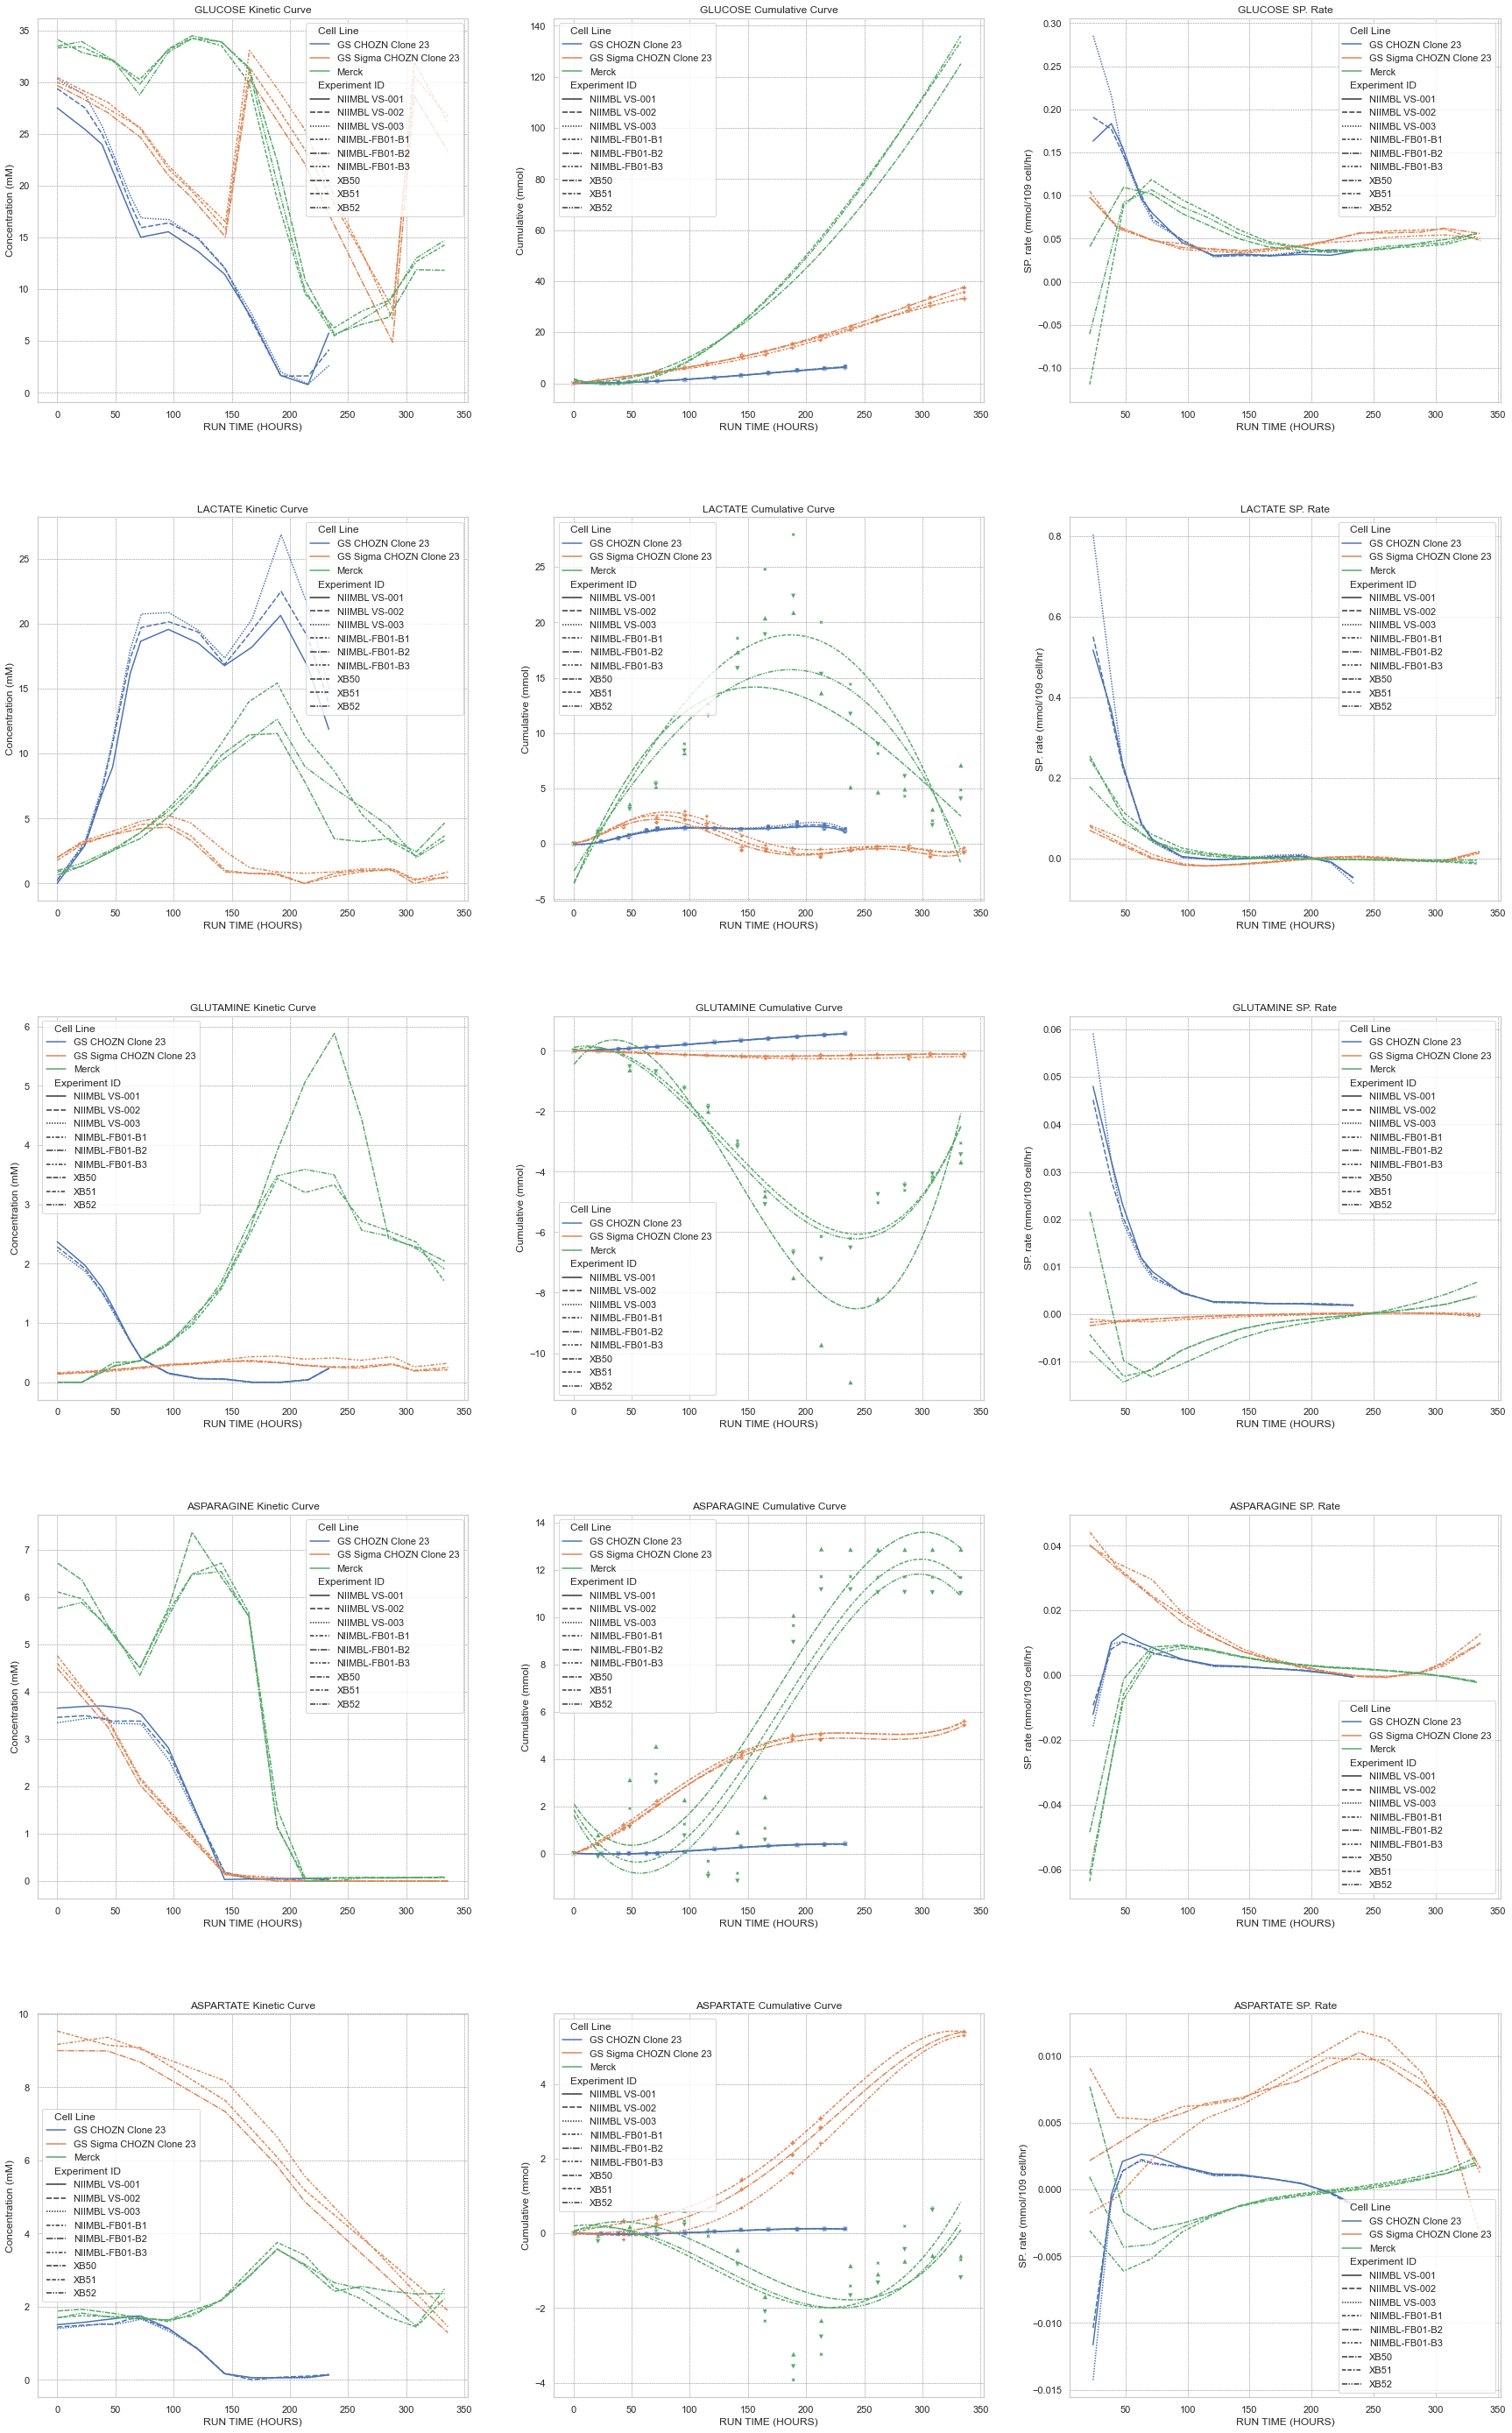

In [6]:
plot_list = ['Glucose','Lactate','Glutamine','Asparagine','Aspartate']

fig = cell_line.plot_cell_lines(spc_list=plot_list, compare_cell_line=True, method='polyreg')

# Data Aggregation

In [8]:
cell_line.get_cell_line_list()

['GS CHOZN Clone 23', 'GS Sigma CHOZN Clone 23', 'Merck']

In [9]:
cell_line.save_excel(cell_line='GS CHOZN Clone 23', file_name='cl_1')
cell_line.save_excel(cell_line='GS Sigma CHOZN Clone 23', file_name='cl_2')
cell_line.save_excel(cell_line='Merck', file_name='cl_3')

Directory  /Users/galileo/development/Reserch/UMN_Research/CCDPA_git/CCDPApy/output_files  Created 
cl_1.xlsx saving...


AttributeError: 'BioProcess' object has no attribute '_aa_df'